In [3]:
# coding: utf-8

# In[346]:


from array import array
import sys
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

import math
import csv
import pandas

In [4]:
def Square_difference_Cost_Function(Y_predict,Y_true):

    CostFunction = np.sum((Y_predict-Y_true)**2)
    return CostFunction

In [5]:

class Lagrangians(object):
    
    def __init__(self):
        m = 1

    def SHO_Lagrangian(self,Phase_Space_time_samples):
        m = 1
        GM = 2
        l = 1.3
        Number_Of_Samples = len(Phase_Space_time_samples[1,:])
        x = Phase_Space_time_samples[1,:]
        v = Phase_Space_time_samples[2,:]   

        Lagrangian_Samples = 0.5*m*(v**2) - (l**2)/(2*m*(x**2)) + GM*m/x
        
        return         Lagrangian_Samples 
    
    
    def Lagrangian_Mass(self):
        m = 1
        return m
    
def Calculate_Lagrangian_for_1D_SHO_(Phase_Space_time_samples):
    Lagrangian_for_1D_SHO_ = Lagrangian_for_1D_SHO(Phase_Space_time_samples)
    return Lagrangian_for_1D_SHO_



Phase_Space_time_samples = np.random.rand(3,5)
L = Lagrangians()
print(L.SHO_Lagrangian(Phase_Space_time_samples))

print(L.Lagrangian_Mass())

[ -0.06873774   1.32648118 -25.93496162   1.15646769   1.16624821]
1


In [6]:
def Create_true_path(First_Three_Space_Time_samples,T_total):

    ## First_Three_Space_Time_samples [x1,x2,x3],[t1,t2,t3]
    dq = (First_Three_Space_Time_samples[0,2] - First_Three_Space_Time_samples[0,0])/2
    dt = (First_Three_Space_Time_samples[1,2] - First_Three_Space_Time_samples[1,0])/2
    dv = First_Three_Space_Time_samples[0,2] + First_Three_Space_Time_samples[0,0] -2*First_Three_Space_Time_samples[0,1] 
    

    q_0 = First_Three_Space_Time_samples[0,1]
    v_0 = dq/dt
    Initial_conditions = np.array([q_0,v_0])



    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dv_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    v_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    v_true[0] = Initial_conditions[1]
    
    L = Lagrangians()
#     dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)


    dq_true[0], dv_true[0] = Create_True_Lagrangian_Changes(L,Initial_conditions,dt,dq,T_total)

    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        v_true[i] = v_true[i-1] + dv_true[i-1]
#         dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)
        dq_true[i], dv_true[i] = Create_True_Lagrangian_Changes(L,np.array([q_true[i],v_true[i]]),dt,dq_true[i-1],T_total)

    return q_true, v_true, dq_true, dv_true




def Create_True_Lagrangian_Changes(L,Curent_state,dt,dq,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))

    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])


    

    Phase_Space_time_samples = np.array([Sample1, Sample2]).transpose()
#     print(    Phase_Space_time_samples) 
    
    Lagrangian_Samples = L.SHO_Lagrangian(Phase_Space_time_samples)

    F = (Lagrangian_Samples[1] - Lagrangian_Samples[0])/dq

    v_0 = Curent_state[1]
    m = L.Lagrangian_Mass()
    
    dq_true  = v_0*dt + (F/m)*(dt**2)
    dv_true  = (F/m)*dt
    

    return dq_true, dv_true    

1.0000000000000009
[1.         0.98984507]


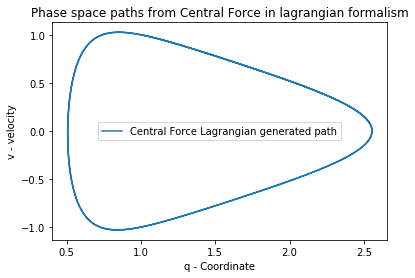

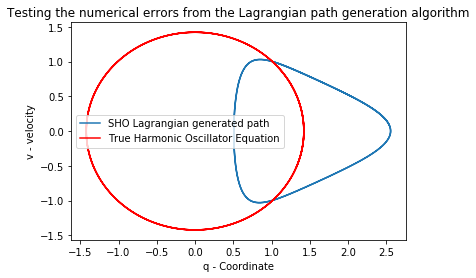

In [7]:

T_total = 20
First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
    
q_true, v_true, dq_true, dp_true = Create_true_path(First_Three_Space_Time_samples,T_total)

plt.figure(1)
plt.plot(q_true,v_true)
plt.title("Phase space paths from Central Force in lagrangian formalism")
plt.xlabel("q - Coordinate")
plt.ylabel("v - velocity")
plt.legend(["Central Force Lagrangian generated path","NN Generated Path"])



dq = (First_Three_Space_Time_samples[0,2] - First_Three_Space_Time_samples[0,0])/2
dt = (First_Three_Space_Time_samples[1,2] - First_Three_Space_Time_samples[1,0])/2

q_0 = First_Three_Space_Time_samples[0,1]
v_0 = dq/dt
print(v_0)
Initial_conditions = np.array([q_0,v_0])

Number_Of_Samples = int(T_total / dt)
t = np.linspace(0,T_total,Number_Of_Samples)

w = 1

A = q_0
B = v_0/w


q = A*np.cos(w*t) + B*np.sin(w*t)
v = -A*np.sin(w*t) + w*B*np.cos(w*t)
print(v[0:2])
plt.figure(2)
plt.plot(q_true,v_true)
plt.plot(q,v,'r')
plt.title("Testing the numerical errors from the Lagrangian path generation algorithm")
plt.xlabel("q - Coordinate")
plt.ylabel("v - velocity")
plt.legend(["SHO Lagrangian generated path","True Harmonic Oscillator Equation"])

In [8]:
## Two mode optimizer
#function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)
import numpy as np
import matplotlib.pyplot as plt

def Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search):

# function [Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration] = Two_Mode_Optimizer(InitialParameters,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue)


    Vectorized_Implimentation = 0
    For_Loop_Implimentation = 1
    TargetedSearch = np.zeros((len(InitialParameters),NumberOfSamples))
    if sum(abs(Parameter_ChangeVector)) > SignificantChangeValue:
        ImprovementItteration = 1


    
    if Vectorized_Implimentation == 1:
        TargetedSearch = exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)*diag(TargetedMultiplicationFactor*(-Cost_Change)*Parameter_ChangeVector)*ones(length(InitialParameters),NumberOfSamples)*diag(rand(NumberOfSamples,1))
        RandomSearch = exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor*(rand(length(InitialParameters),NumberOfSamples)-0.5)


    if For_Loop_Implimentation == 1:
        RandomNumbers = np.random.rand(NumberOfSamples,1)
        

        TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-Cost_Change)

        for sample in range (1,NumberOfSamples):

            TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

            
            
        if np.max(np.max(TargetedSearch)) > 10: ## This is if the change vector is too bid
            print("Applied supression of change vector")
            TargetedSearch_Amplitude = RandomNumbers*np.exp(-(ImprovementItteration-1)/TargetedSearchDecayRate)         *TargetedMultiplicationFactor*(-1)

            for sample in range (1,NumberOfSamples):

                TargetedSearch[:,sample] = TargetedSearch_Amplitude[sample]*Parameter_ChangeVector[:,0]

        RandomSearch = min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search)         *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)
        
    
        if min(np.exp((ImprovementItteration-1)*RandomSearchGrowthRate)*RandomMultiplicationFactor,Maximal_Random_Search) == Maximal_Random_Search:
            RandomSearch = np.sin((ImprovementItteration-1)*2*RandomSearchGrowthRate + np.pi/2)*0.1             *(np.random.rand(len(InitialParameters),NumberOfSamples)-0.5)

    Suggested_Parameter_Samples_From_Two_Mode = InitialParameters + TargetedSearch + RandomSearch
    Suggested_Parameter_Samples_From_Two_Mode[:,1] = InitialParameters[:,0]

    ImprovementItteration = ImprovementItteration +1;


    return Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration




def Optimize_With_Two_Mode_Algorithm(q_true, p_true, dq_true, dp_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations):
    
    Parameter_ChangeVector = np.zeros((len(InitialParameters),1))
    Cost_Change = 0
    
    PreviousCost = Cost1.Cost_Function(InitialParameters)
    Best_Individual = InitialParameters

    for i in range(0,Number_Of_Itterations):
        

        Suggested_Parameter_Samples_From_Two_Mode,ImprovementItteration = Two_Mode_Optimizer(Best_Individual,NumberOfSamples,Parameter_ChangeVector,Cost_Change,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search)

        Cost    = Cost1.Cost_Function(Suggested_Parameter_Samples_From_Two_Mode)
        index_min = np.argmin(Cost)
        CurrentCost = Cost[index_min ]

        Cost_Change = CurrentCost - PreviousCost
        Parameter_ChangeVector = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T - Best_Individual
        Best_Individual = np.array([Suggested_Parameter_Samples_From_Two_Mode[:,index_min]]).T

        PreviousCost = CurrentCost
        if print_Cost == 1:
            print("CurrentCost is:",CurrentCost)
            print("")
            print("Now Running Itteration",i,"\\",Number_Of_Itterations)
            print("the ImprovementItteration is:",ImprovementItteration)
    return Best_Individual

print(1)

1


In [9]:

def Save_to_CSV(Net1_Parameters,Net2_Parameters):
    
        ## Save the parameters of the network
#         Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"

        Name_Of_Parameter_File = "Lagrangian_Networks_Parameters.csv"

        with open(Name_Of_Parameter_File, 'w') as csvfile:
            fieldnames = ['Net1_Parameters','Net2_Parameters']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()

            for i in range(0,Net1_Parameters.shape[0]):
                writer.writerow({ 'Net1_Parameters':Net1_Parameters[i],   'Net2_Parameters':Net2_Parameters[i]})




def Load_Parameters_And_Indexes_Of_Specialist():
#     Name_Of_Parameter_File = "Specialist" + str (network) + "_Parameters.csv"
    Name_Of_Parameter_File = "Lagrangian_Networks_Parameters.csv"
 
    ## Open Parameter array
    Parameters_Path = r"C:\Users\benjy\OneDrive\Brown\Fall 2018\PHYS 2030 - Classical Physics\Project\Files for the project\Central Force" 
    Parameters_Path1 = Parameters_Path + "\\" + Name_Of_Parameter_File
    Parameters_temp = pandas.read_csv(Parameters_Path1)
    Parameters_Array = np.array(Parameters_temp)

    
    return Parameters_Array



def Open_Parameters_Of_Network():
    Best_Individual1 = Load_Parameters_And_Indexes_Of_Specialist()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1



In [10]:
Number_Of_Nurons_in_5_layer_net = np.array([3,10,3,10,1])
TotalParameters_in_5_layer_net = 2*(Number_Of_Nurons_in_5_layer_net[0]*Number_Of_Nurons_in_5_layer_net[1] + \
Number_Of_Nurons_in_5_layer_net[1]*Number_Of_Nurons_in_5_layer_net[2] + \
Number_Of_Nurons_in_5_layer_net[2]*Number_Of_Nurons_in_5_layer_net[3] +\
Number_Of_Nurons_in_5_layer_net[3]*Number_Of_Nurons_in_5_layer_net[4] + np.sum(Number_Of_Nurons_in_5_layer_net))

print("TotalParameters_in_5_layer_net",TotalParameters_in_5_layer_net)

TotalParameters_in_5_layer_net 254


In [11]:
## Defining the 5 layer complex network


class Net5_(object):
    
    def __init__(self, Parameter_Vector, Number_Of_Nurons_in_5_layer_net):
        
        N_0 = 0
        N1 = Number_Of_Nurons_in_5_layer_net[0]
        N2 = Number_Of_Nurons_in_5_layer_net[1]
        N3 = Number_Of_Nurons_in_5_layer_net[2]
        N4 = Number_Of_Nurons_in_5_layer_net[3]
        N5 = Number_Of_Nurons_in_5_layer_net[4]
        
        ## Reshaping into Weights
        self.W1 = Parameter_Vector[N_0 :N_0 + N1*N2].reshape(N1,N2) + \
                    1j*Parameter_Vector[N_0 + N1*N2:N_0 + 2*N1*N2].reshape(N1,N2)
        N_0 += 2*N1*N2     
        
        self.W2 =Parameter_Vector[N_0:N_0 + N2*N3].reshape(N2,N3) + \
                    1j*Parameter_Vector[N_0+ N2*N3:N_0 + 2*N2*N3].reshape(N2,N3)
        N_0 += 2*N2*N3      
        
        self.W3 =Parameter_Vector[N_0:N_0 + N3*N4].reshape(N3,N4) + \
                    1j*Parameter_Vector[N_0+ N3*N4:N_0 + 2*N3*N4].reshape(N3,N4)
        N_0 += 2*N3*N4      

        self.W4 =Parameter_Vector[N_0:N_0 + N4*N5].reshape(N4,N5) + \
                    1j*Parameter_Vector[N_0+ N4*N5:N_0 + 2*N4*N5].reshape(N4,N5)
        N_0 += 2*N4*N5     
        
        self.W5 =Parameter_Vector[N_0:N_0 + N5*1].reshape(N5,1) + \
                    1j*Parameter_Vector[N_0+ N5*1:N_0 + 2*N5*1].reshape(N5,1)
        N_0 += 2*N5*1          
        
        
        ## Reshaping into biases
        self.b1 = Parameter_Vector[N_0 :N_0 + N2].reshape(N2,1) + 1j*Parameter_Vector[N_0 + N2:N_0 + 2*N2].reshape(N2,1)
        N_0 += 2*N2        
        
        self.b2 =  Parameter_Vector[N_0:N_0 + N3].reshape(N3,1) + 1j* Parameter_Vector[N_0 + N3:N_0 + 2*N3].reshape(N3,1)
        N_0 += 2*N3      
        
        self.b3 =  Parameter_Vector[N_0:N_0 + N4].reshape(N4,1) + 1j* Parameter_Vector[N_0 + N4:N_0 + 2*N4].reshape(N4,1)
        N_0 += 2*N4      
        
        self.b4 =  Parameter_Vector[N_0:N_0 + N5].reshape(N5,1) + 1j* Parameter_Vector[N_0 + N5:N_0 + 2*N5].reshape(N5,1)
        N_0 += 2*N5        
        
        self.b5 = Parameter_Vector[N_0:N_0 + 1].reshape(1,1) + 1j*Parameter_Vector[N_0 + 1:N_0 + 2*1].reshape(1,1)
        N_0 += 2*1    
        
def Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net):
    Net_ = Net5_(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)
    return Net_




Parameter_Vector = np.random.rand(TotalParameters_in_5_layer_net)
Net5 = Reshape_into_5_layer_net(Parameter_Vector,Number_Of_Nurons_in_5_layer_net)

print(Net5.W1.shape)

(3, 10)


In [12]:
def Run_Through_5_layer_Net(Net,X):

        Z1 = np.dot(Net.W1.T,X) + Net.b1
        A1 = np.maximum(Z1.real,0) + 0.1*np.minimum(Z1.real,0) + 1j*(np.maximum(Z1.imag,0) + 0.1*np.minimum(Z1.imag,0))


        Z2 = np.dot(Net.W2.T,A1) + Net.b2
        A2 = np.maximum(Z2.real,0) + 0.1*np.minimum(Z2.real,0) + 1j*(np.maximum(Z2.imag,0) + 0.1*np.minimum(Z2.imag,0))
    
        Z3 = np.dot(Net.W3.T,A2) + Net.b3
        A3 = np.maximum(Z3.real,0) + 0.1*np.minimum(Z3.real,0) + 1j*(np.maximum(Z3.imag,0) + 0.1*np.minimum(Z3.imag,0))        
        
        Z4 = np.dot(Net.W4.T,A3) + Net.b4
#         A4 = np.maximum(Z4,0) + 0.1*np.minimum(Z4,0)
        A4 = np.maximum(Z4.real,0) + 0.1*np.minimum(Z4.real,0) + 1j*(np.maximum(Z4.imag,0) + 0.1*np.minimum(Z4.imag,0))
    
    
        Z5 = np.dot(Net.W4.T,A3) + Net.b5
        A5 = (10**(-3))*Z5.real

        return A5

CurrentCost is: 0.2888774062806117

Now Running Itteration 0 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.2831265974121188

Now Running Itteration 1 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.2789198555888806

Now Running Itteration 2 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.2729865899424034

Now Running Itteration 3 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.2691689562893557

Now Running Itteration 4 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.26544531122505766

Now Running Itteration 5 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.2596320335696186

Now Running Itteration 6 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.25606100282034205

Now Running Itteration 7 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.24588583504017114

Now Running Itteration 8 \ 20
the ImprovementItteration is: 2
CurrentCost is: 0.23823885388891974

Now Running Itteration 9 \ 20
the ImprovementItteration is: 2
CurrentCost is: 

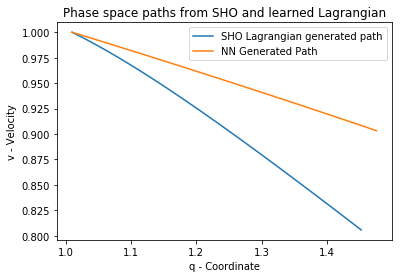

CurrentCost is: 85.86791106025005

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 27.142074283245677

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 13.171667142227552

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 7.3149677413965914

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 6.567279883494933

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 5.230806255000909

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 4.083245421668947

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.9846461729495317

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.939913662173555

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.8939117266507157

Now Running Itteration 9 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.8939117

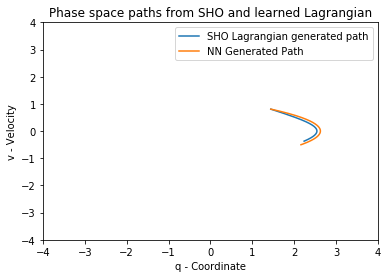

CurrentCost is: 2351.113327440824

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 2055.985406335125

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 2015.212908821971

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 1363.8228959441344

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 1363.8228959441344

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 1349.9446916101642

Now Running Itteration 5 \ 15
the ImprovementItteration is: 3
CurrentCost is: 916.642588070369

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 881.6193177332748

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 541.8759475579385

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
Applied supressio

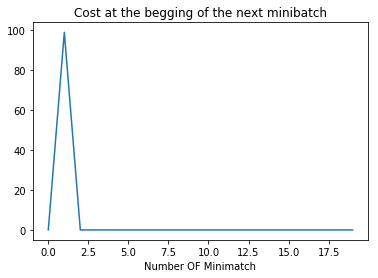

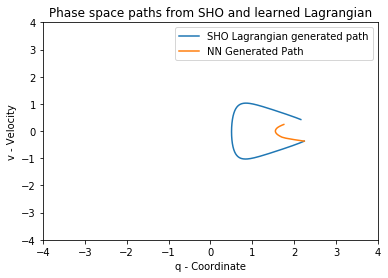

CurrentCost is: 1611.8644394927564

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 134.33249585995384

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 4.412774590611181

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 1.858457616581537

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 0.5052855576220573

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 0.35070375484108396

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 0.35070375484108396

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 0.35070375484108396

Now Running Itteration 7 \ 15
the ImprovementItteration is: 3
CurrentCost is: 0.35070375484108396

Now Running Itteration 8 \ 15
the ImprovementItteration is: 4
CurrentCost is: 0.31743717276039674

Now Run

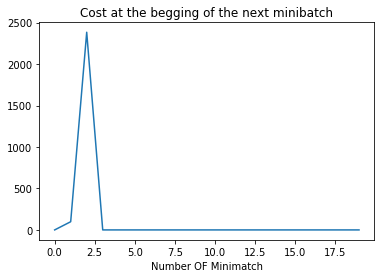

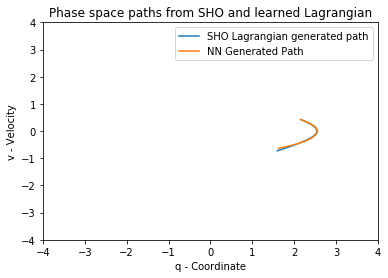

CurrentCost is: 6365.9050879774495

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 355.5039324839287

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 326.5959539371798

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 326.5959539371798

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 302.36030510145224

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 302.36030510145224

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 279.61858976687444

Now Running Itteration 6 \ 15
the ImprovementItteration is: 3
CurrentCost is: 279.61858976687444

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 265.7918493484839

Now Running Itteration 8 \ 15
the ImprovementItteration is: 3
CurrentCost is: 253.79446532395676

Now Running Itteration 9 \ 15
the ImprovementItter

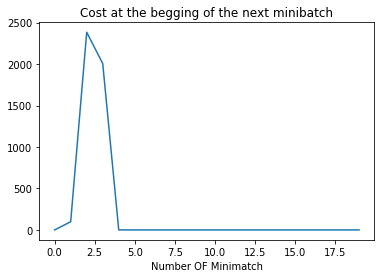

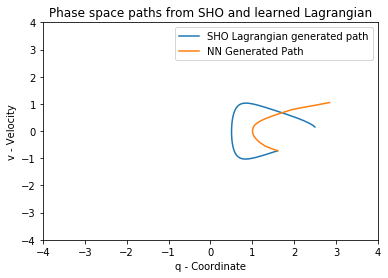

CurrentCost is: 3850.031494404739

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 3554.541723831394

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 79.12764909913867

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 62.29686890033983

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 62.29686890033983

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 37.56453335625135

Now Running Itteration 5 \ 15
the ImprovementItteration is: 3
CurrentCost is: 33.11501285240694

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 21.41834505611825

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 8.889237331183985

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 8.03409348304296

Now Running Itteratio

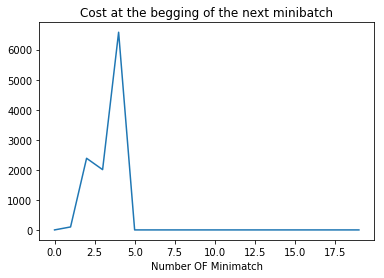

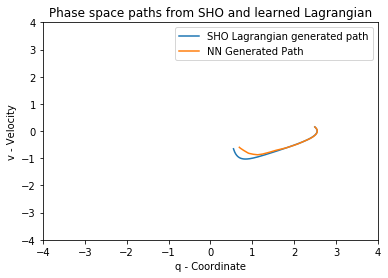

CurrentCost is: 573.8831959597803

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 496.550598979528

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 373.6406569186748

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 330.57834797665504

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 312.2826341754872

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 298.5382787589071

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 298.5382787589071

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 279.89895533115964

Now Running Itteration 7 \ 15
the ImprovementItteration is: 3
CurrentCost is: 227.91366330836277

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 227.91366330836277

Now Running Itteration 9 \ 15
the ImprovementItterati

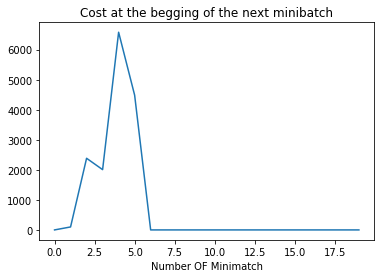

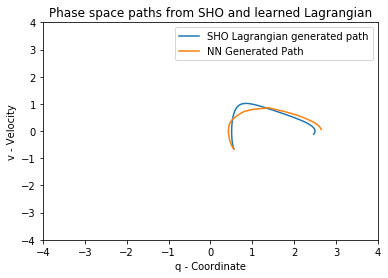

CurrentCost is: 175.5820995403522

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 135.2323899278332

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 131.13662104497612

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 94.42360169465752

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 85.08587646901368

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 85.08587646901368

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 85.08587646901368

Now Running Itteration 6 \ 15
the ImprovementItteration is: 3
CurrentCost is: 85.08587646901368

Now Running Itteration 7 \ 15
the ImprovementItteration is: 4
CurrentCost is: 85.08587646901368

Now Running Itteration 8 \ 15
the ImprovementItteration is: 5
CurrentCost is: 82.11234554674755

Now Running Itteration 9 \ 15
the ImprovementItteration is: 6
CurrentCost is: 82.1123455467

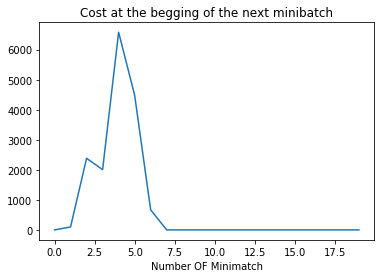

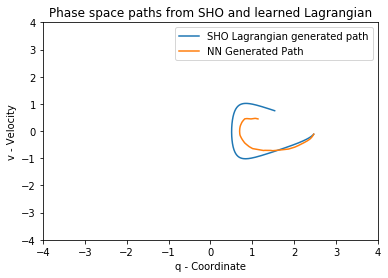

CurrentCost is: 52.787040863566276

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 52.787040863566276

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 7.7917116472543055

Now Running Itteration 2 \ 15
the ImprovementItteration is: 3
CurrentCost is: 4.914785254851249

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.688195487324845

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.28258830552291

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.28258830552291

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 2.842738410377543

Now Running Itteration 7 \ 15
the ImprovementItteration is: 3
CurrentCost is: 2.753326054881049

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 2.2196554260680847

Now Running Itteration 9 \ 15
the ImprovementItteration is: 2
CurrentCost is: 2.1611232588

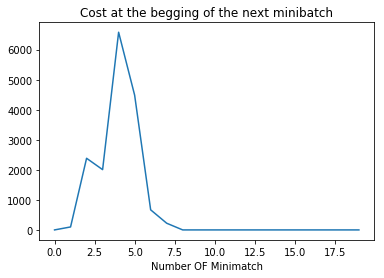

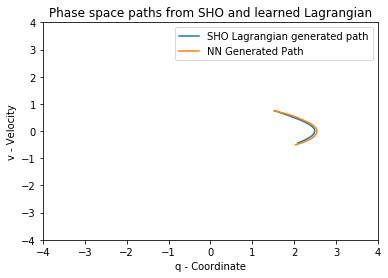

CurrentCost is: 290.0053289277177

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 250.37829319934443

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 250.37829319934443

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 245.8834736428662

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 217.09459086082123

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 178.87916184587237

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 177.80301581442703

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 176.54577793118239

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 154.2477476903636

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 125.8114630560109

Now Running Itteration 9 \ 15
the ImprovementItteration is: 2
CurrentCost is: 122.7335

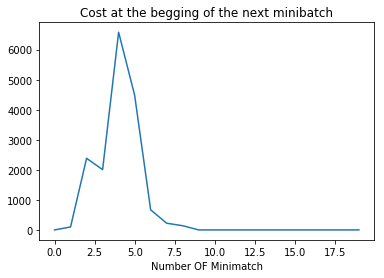

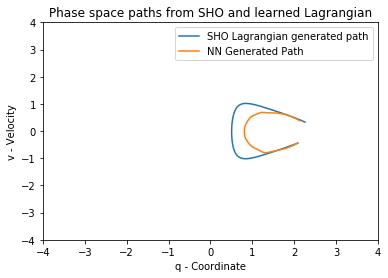

CurrentCost is: 109.24468026226066

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 69.32456097365504

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 14.99677891207745

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 14.99677891207745

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 4.185508670365203

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 3.463738273851644

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.463738273851644

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 3.463738273851644

Now Running Itteration 7 \ 15
the ImprovementItteration is: 3
CurrentCost is: 3.2429236054390795

Now Running Itteration 8 \ 15
the ImprovementItteration is: 4
CurrentCost is: 2.811869916206131

Now Running Itteration 9 \ 15
the ImprovementItteration is: 2
CurrentCost is: 2.8118699162

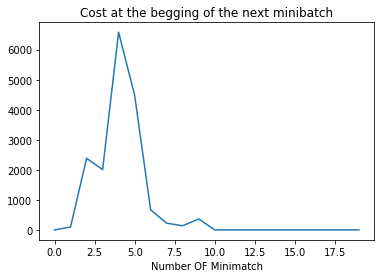

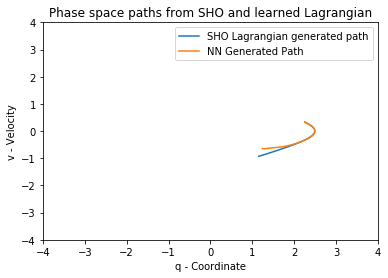

CurrentCost is: 84.54387486759332

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 83.54261177109227

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 71.54032876855325

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 65.32834025558766

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 55.529611299382154

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 55.529611299382154

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 54.994132002961585

Now Running Itteration 6 \ 15
the ImprovementItteration is: 3
CurrentCost is: 54.994132002961585

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 53.310673787605985

Now Running Itteration 8 \ 15
the ImprovementItteration is: 3
CurrentCost is: 52.7968016432227

Now Running Itteration 9 \ 15
the ImprovementItteration is: 2
CurrentCost is: 47.9900605

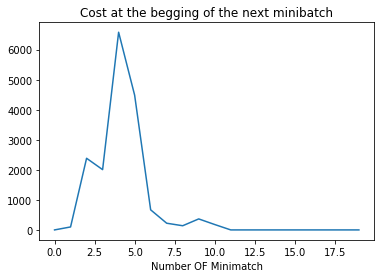

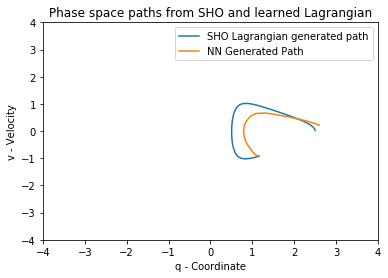

CurrentCost is: 57.81124993784742

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 57.81124993784742

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 55.062745923420515

Now Running Itteration 2 \ 15
the ImprovementItteration is: 3
CurrentCost is: 55.062745923420515

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 49.87584889473298

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 49.87584889473298

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 49.87584889473298

Now Running Itteration 6 \ 15
the ImprovementItteration is: 3
CurrentCost is: 47.710416610615034

Now Running Itteration 7 \ 15
the ImprovementItteration is: 4
CurrentCost is: 47.710416610615034

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 47.710416610615034

Now Running Itteration 9 \ 15
the ImprovementItteration is: 3
CurrentCost is: 47.710416

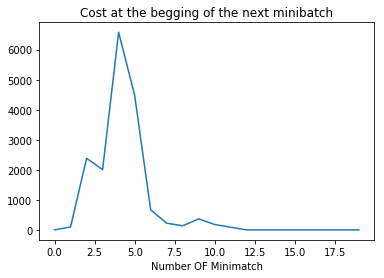

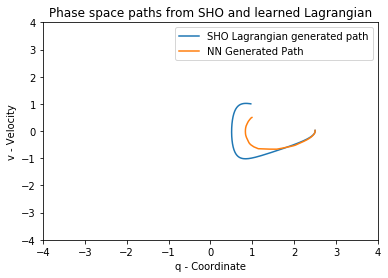

CurrentCost is: 421.15413605814797

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 308.5063664682522

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 80.04954542618334

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 33.58045299863531

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 28.521522262123447

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 26.21752465858549

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 26.21752465858549

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 25.492943295777565

Now Running Itteration 7 \ 15
the ImprovementItteration is: 3
CurrentCost is: 25.492943295777565

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is:

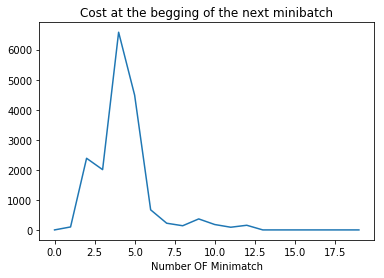

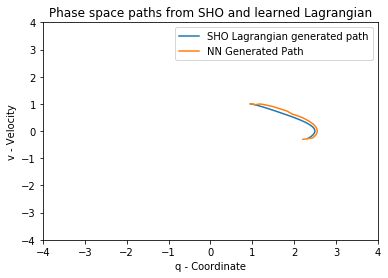

CurrentCost is: 346.4489630482155

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 101.67455110054544

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 99.62882781280844

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 99.62882781280844

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 94.2149301715025

Now Running Itteration 4 \ 15
the ImprovementItteration is: 3
CurrentCost is: 94.2149301715025

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 89.71631203453204

Now Running Itteration 6 \ 15
the ImprovementItteration is: 3
CurrentCost is: 85.27733397363178

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 83.81288640197306

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 83.14384107196513

Now Running Itteration 9 \ 15
the ImprovementItteration i

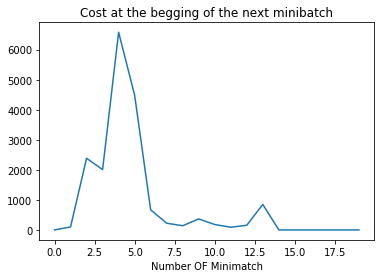

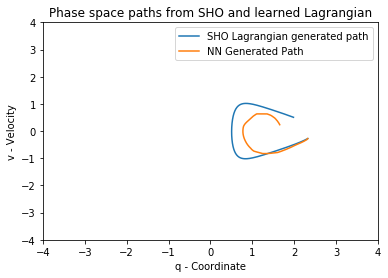

CurrentCost is: 441.9033143216481

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 145.83243581501344

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 145.83243581501344

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 54.83058672700944

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 54.83058672700944

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 54.83058672700944

Now Running Itteration 5 \ 15
the ImprovementItteration is: 3
CurrentCost is: 13.32344248349603

Now Running Itteration 6 \ 15
the ImprovementItteration is: 4
CurrentCost is: 8.442874190080902

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 8.225578319861317

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 8.225578319861317

Now Running Itteration 9 \ 15
the ImprovementItteratio

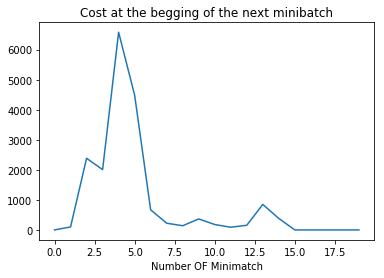

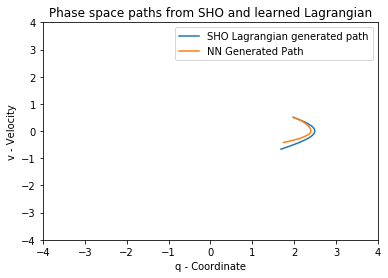

CurrentCost is: 148.23840145436426

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 148.23840145436426

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 129.00472530246142

Now Running Itteration 2 \ 15
the ImprovementItteration is: 3
CurrentCost is: 93.55952087566419

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 93.55952087566419

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 91.66255043752601

Now Running Itteration 5 \ 15
the ImprovementItteration is: 3
CurrentCost is: 86.1189288778433

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 80.86184707024515

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 79.80104661805291

Now Running Itteration 8 \ 15
the ImprovementItteration is: 2
CurrentCost is: 79.80104661805291

Now Running Itteration 9 \ 15
the ImprovementItteration is: 2
CurrentCost is: 79.801046618

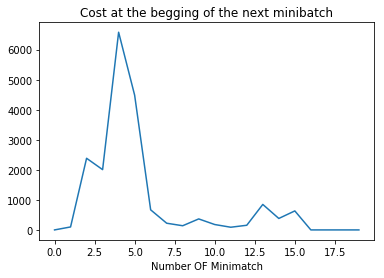

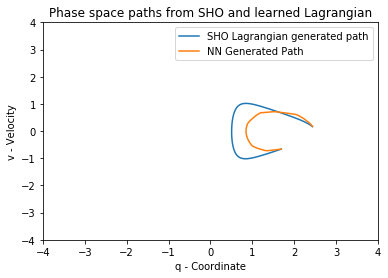

CurrentCost is: 105.45660738329984

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 36.230041309469584

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
CurrentCost is: 36.230041309469584

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 36.230041309469584

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 30.97377267243277

Now Running Itteration 4 \ 15
the ImprovementItteration is: 4
CurrentCost is: 19.691510719801965

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 19.691510719801965

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
CurrentCost is: 19.691510719801965

Now Running Itteration 7 \ 15
the ImprovementItteration is: 3
CurrentCost is: 19.691510719801965

Now Running Itteration 8 \ 15
the ImprovementItteration is: 4
CurrentCost is: 19.052523461912692

Now Running Itteration 9 \ 15
the ImprovementItteration is: 5
CurrentCost is: 19.05

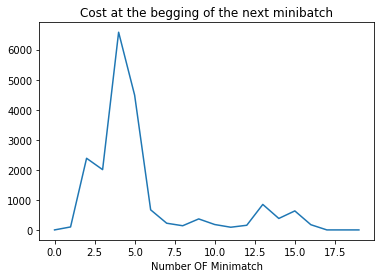

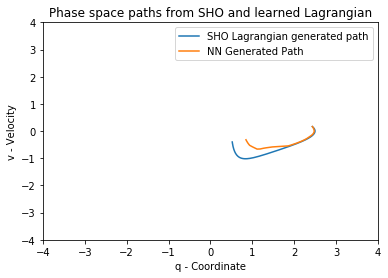

CurrentCost is: 5302.347287266827

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 2959.316950955377

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 2490.6220502369983

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 2417.813097122545

Now Running Itteration 3 \ 15
the ImprovementItteration is: 2
CurrentCost is: 401.60925241291056

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 384.0305013189931

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 225.21125591940825

Now Running Itteration 6 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 201.31768992742232

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 176.1338881889971

Now R

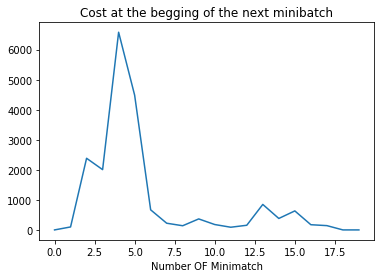

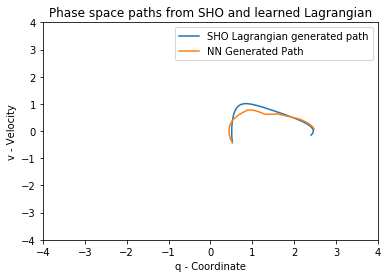

CurrentCost is: 383.6347741469166

Now Running Itteration 0 \ 15
the ImprovementItteration is: 2
CurrentCost is: 236.41637733123804

Now Running Itteration 1 \ 15
the ImprovementItteration is: 2
Applied supression of change vector
CurrentCost is: 236.41637733123804

Now Running Itteration 2 \ 15
the ImprovementItteration is: 2
CurrentCost is: 199.67067698133752

Now Running Itteration 3 \ 15
the ImprovementItteration is: 3
CurrentCost is: 141.2633741032226

Now Running Itteration 4 \ 15
the ImprovementItteration is: 2
CurrentCost is: 141.2633741032226

Now Running Itteration 5 \ 15
the ImprovementItteration is: 2
CurrentCost is: 109.79919261231713

Now Running Itteration 6 \ 15
the ImprovementItteration is: 3
CurrentCost is: 109.79919261231713

Now Running Itteration 7 \ 15
the ImprovementItteration is: 2
CurrentCost is: 93.62423992434707

Now Running Itteration 8 \ 15
the ImprovementItteration is: 3
CurrentCost is: 91.63745692675349

Now Running Itteration 9 \ 15
the ImprovementIttera

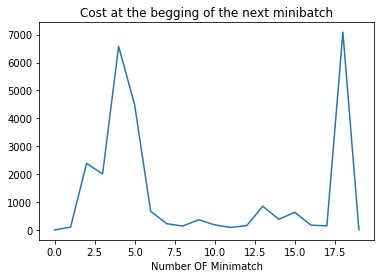

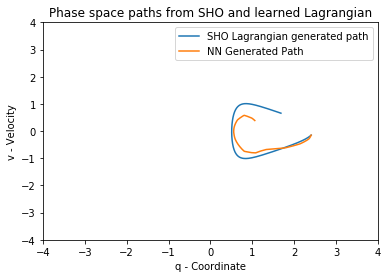

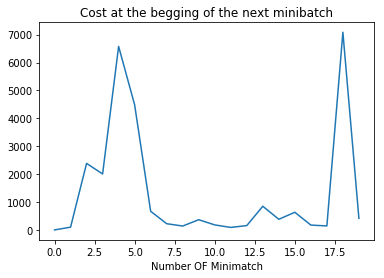

In [33]:
def Calculate_Loss_Function2(q_true, v_true, dq_true, dv_true, q_predicted, v_predicted, dq_predicted, dv_predicted):
    Loss1 = np.sum((q_true - q_predicted)**2) + np.sum((v_true - v_predicted)**2)

    Scaling_Factor1 = np.mean(np.abs((q_true - q_predicted)/(dq_true - dq_predicted)))
    Scaling_Factor2 = np.mean(np.abs((v_true - v_predicted)/(dv_true - dv_predicted)))
#     Scaling_Factor1 = 1
#     Scaling_Factor2 = 1

    Loss2 = Scaling_Factor1*np.sum((dq_true - dq_predicted)**2) + Scaling_Factor2*np.sum((dv_true - dv_predicted)**2)

    Loss =  Loss2 + Loss1
    return Loss



## Defining Cost Function
class Cost_Function:
    def Cost_Function(self,Individuals_Parameter_Vector): 

        NumberOfSamples = Individuals_Parameter_Vector.shape[1]
        Cost_Function1 = np.zeros(NumberOfSamples)
        for i in range (0,NumberOfSamples):
            
            q_predicted, v_predicted, dq_predicted, dv_predicted =Create_predicted_path2(Individuals_Parameter_Vector[:,i],First_Three_Space_Time_samples,T_total)
            Cost_Function1[i] = Calculate_Loss_Function2(q_true, v_true, dq_true, dv_true, q_predicted, v_predicted, dq_predicted, dv_predicted)


        return Cost_Function1
    



def Create_Predictions_for_paths2(Net1,Net2,Curent_state,dt,dq,T_total):
    ## Change this to curent state and include time

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))

    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])


    

    Phase_Space_time_samples = np.array([Sample1, Sample2]).transpose()
#     print(    Phase_Space_time_samples) 
    
    Lagrangian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    
#     print(Lagrangian_Samples.shape)
    F = (Lagrangian_Samples[0,1] - Lagrangian_Samples[0,0])/dq

    v_0 = Curent_state[1]
    m = 1 ### Important Note that this should be another parameter of the optimization ###
    
    dq_true  = v_0*dt + (F/m)*(dt**2)
    dv_true  = (F/m)*dt
    

    return dq_true, dv_true       
    



def Create_predicted_path2(Parameter_Vector,First_Three_Space_Time_samples,T_total):

    ## First_Three_Space_Time_samples [x1,x2,x3],[t1,t2,t3]
    dq = (First_Three_Space_Time_samples[0,2] - First_Three_Space_Time_samples[0,0])/2
    dt = (First_Three_Space_Time_samples[1,2] - First_Three_Space_Time_samples[1,0])/2
    dv = First_Three_Space_Time_samples[0,2] + First_Three_Space_Time_samples[0,0] -2*First_Three_Space_Time_samples[0,1] 
    

    q_0 = First_Three_Space_Time_samples[0,1]
    v_0 = dq/dt
    Initial_conditions = np.array([q_0,v_0])



    ## Creating Nets
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    
    
    NumberOfSamples = int(T_total/dt)
    dq_true = np.zeros(NumberOfSamples)
    dv_true = np.zeros(NumberOfSamples)
    q_true = np.zeros(NumberOfSamples)
    v_true = np.zeros(NumberOfSamples)

    ## Initializing
    q_true[0] = Initial_conditions[0]
    v_true[0] = Initial_conditions[1]
    
    L = Lagrangians()
#     dq_true[0], dp_true[0] = Create_True_Hamiltonian_paths(H,Initial_conditions,dt,dq,dp,T_total)

# Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,T_total)
    dq_true[0], dv_true[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,T_total)

    for i in range(1,NumberOfSamples):

        q_true[i] = q_true[i-1] + dq_true[i-1]
        v_true[i] = v_true[i-1] + dv_true[i-1]
#         dq_true[i], dp_true[i] = Create_True_Hamiltonian_paths(H,np.array([q_true[i],p_true[i]]),dt,dq_true[i-1],dp_true[i-1],T_total)
#         dq_true[i], dv_true[i] = Create_True_Lagrangian_Changes(L,np.array([q_true[i],v_true[i]]),dt,dq_true[i-1],T_total)
        dq_true[i], dv_true[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_true[i],v_true[i]]),dt,dq_true[i-1],T_total)
    return q_true, v_true, dq_true, dv_true




def Create_True_Lagrangian_Changes(L,Curent_state,dt,dq,T_total):

    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))

    Sample1 = np.array([t[i],Curent_state[0] - dq/2,Curent_state[1]])               
    Sample2 = np.array([t[i],Curent_state[0] + dq/2,Curent_state[1]])


    

    Phase_Space_time_samples = np.array([Sample1, Sample2]).transpose()
#     print(    Phase_Space_time_samples) 
    
    Lagrangian_Samples = L.SHO_Lagrangian(Phase_Space_time_samples)

    F = (Lagrangian_Samples[1] - Lagrangian_Samples[0])/dq

    v_0 = Curent_state[1]
    m = L.Lagrangian_Mass()
    
    dq_true  = v_0*dt + (F/m)*(dt**2)
    dv_true  = (F/m)*dt
    

    return dq_true, dv_true    




## Setting the hyperparameters for two mode
ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =10
Maximal_Random_Search = 0.001
NumberOfSamples = 10 ## This is the number of individuals in each itteration


Number_Of_Itterations =20
print_Cost = 1


x = 1
y = 1

First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
q_true, v_true, dq_true, dp_true = Create_true_path(First_Three_Space_Time_samples,T_total)

# First_two_phase_space_samples = np.array([[1,1.01],[2,2.01],[0,0.01]])
InitialParameters = np.random.rand(int(2*TotalParameters_in_5_layer_net),1)

T_total = 0.5
q_true, v_true, dq_true, dv_true = Create_true_path(First_Three_Space_Time_samples,T_total)
# q_true, p_true, dq_true, dp_true = Create_true_path(First_two_phase_space_samples,T_total)
Cost1 = Cost_Function()


Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, v_true, dq_true, dv_true,InitialParameters,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)



# q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)

q_predicted, v_predicted, dq_predicted, dv_predicted =Create_predicted_path2(Best_Individual,First_Three_Space_Time_samples,T_total)
    

plt.figure(0)
plt.plot(q_true,v_true)
plt.plot(q_predicted,v_predicted)
plt.title("Phase space paths from SHO and learned Lagrangian")
plt.xlabel("q - Coordinate")
plt.ylabel("v - Velocity")
plt.legend(["SHO Lagrangian generated path","NN Generated Path"])
plt.show()

Number_Of_Minibatches = 20
Cost_Tracking_Vector = np.zeros(Number_Of_Minibatches)
for i in range (1,Number_Of_Minibatches):
    Number_Of_Itterations =15
    T_total = 4.8
    
    
    N = q_true.shape[0]
    First_Three_Space_Time_samples = np.array([[q_true[N-3],q_true[N-2],q_true[N-1]],[0,0.01,0.02]])
#     First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
    
    q_true, v_true, dq_true, dv_true = Create_true_path(First_Three_Space_Time_samples,T_total)
    
    Cost_Tracking_Vector[i]    = Cost1.Cost_Function(Best_Individual)

    Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, v_true, dq_true, dv_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

    q_predicted, v_predicted, dq_predicted, dv_predicted =Create_predicted_path2(Best_Individual,First_Three_Space_Time_samples,T_total)
    
    plt.figure(4)
    plt.plot(q_true,v_true)
    plt.plot(q_predicted,v_predicted)
    plt.title("Phase space paths from SHO and learned Lagrangian")
    plt.xlabel("q - Coordinate")
    plt.ylabel("v - Velocity")
    plt.legend(["SHO Lagrangian generated path","NN Generated Path"])
    plt.xlim(-4,4)
    plt.ylim(-4,4)
    plt.show()

    
    plt.figure(5)
    plt.title("Cost at the begging of the next minibatch")
    plt.plot(Cost_Tracking_Vector)
    plt.xlabel("Cost")
    plt.xlabel("Number OF Minimatch")


In [21]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

(254,)
(254,)
(508, 1)
(508, 1)


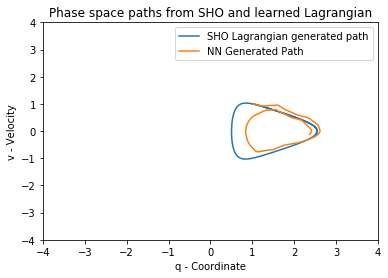

CurrentCost is: 80.1418438961237

Now Running Itteration 0 \ 20
the ImprovementItteration is: 2
CurrentCost is: 80.1418438961237

Now Running Itteration 1 \ 20
the ImprovementItteration is: 3
CurrentCost is: 80.1418438961237

Now Running Itteration 2 \ 20
the ImprovementItteration is: 4
CurrentCost is: 68.78398042881139

Now Running Itteration 3 \ 20
the ImprovementItteration is: 5
CurrentCost is: 68.78398042881139

Now Running Itteration 4 \ 20
the ImprovementItteration is: 2
CurrentCost is: 68.78398042881139

Now Running Itteration 5 \ 20
the ImprovementItteration is: 3
CurrentCost is: 68.78398042881139

Now Running Itteration 6 \ 20
the ImprovementItteration is: 4
CurrentCost is: 68.78398042881139

Now Running Itteration 7 \ 20
the ImprovementItteration is: 5
CurrentCost is: 68.78398042881139

Now Running Itteration 8 \ 20
the ImprovementItteration is: 6
CurrentCost is: 68.78398042881139

Now Running Itteration 9 \ 20
the ImprovementItteration is: 7
CurrentCost is: 67.10559900593066

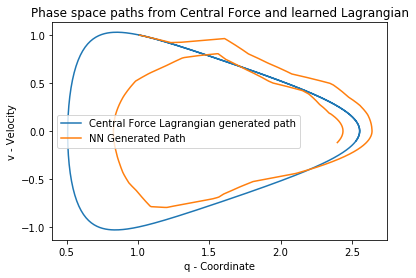

In [31]:
## This is the testing Window


Best_Individual1 = Open_Parameters_Of_Network()
Best_Individual = Best_Individual1
T_total = 12.5
    
## Testing network on longer data
N = q_true.shape[0]
First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
q_true, v_true, dq_true, dp_true = Create_true_path(First_Three_Space_Time_samples,T_total)
q_predicted, v_predicted, dq_predicted, dv_predicted =Create_predicted_path2(Best_Individual,First_Three_Space_Time_samples,T_total)
    
plt.figure(4)
plt.plot(q_true,v_true)
plt.plot(q_predicted,v_predicted)
plt.title("Phase space paths from SHO and learned Lagrangian")
plt.xlabel("q - Coordinate")
plt.ylabel("v - Velocity")
plt.legend(["SHO Lagrangian generated path","NN Generated Path"])
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()




ImprovementItteration = 1
TargetedSearchDecayRate = 0.5
RandomSearchGrowthRate = 0.1
TargetedMultiplicationFactor = 0.5
RandomMultiplicationFactor =  0.1
SignificantChangeValue =0.2
Maximal_Random_Search = 0.005
NumberOfSamples = 10 ## This is the number of individuals in each itteration



Number_Of_Itterations =20
  
N = q_true.shape[0]
# First_two_phase_space_samples = np.array([[q_true[N-2],q_true[N-1]],[p_true[N-2],p_true[N-1]],[0,0.01]])
First_Three_Space_Time_samples = np.array([[1,1.01,1.02],[0,0.01,0.02]])
q_true, v_true, dq_true, dv_true = Create_true_path(First_Three_Space_Time_samples,T_total)

Best_Individual = Optimize_With_Two_Mode_Algorithm(q_true, v_true, dq_true, dv_true,Best_Individual,Cost1,NumberOfSamples,ImprovementItteration,TargetedSearchDecayRate,RandomSearchGrowthRate,TargetedMultiplicationFactor ,RandomMultiplicationFactor,SignificantChangeValue,Maximal_Random_Search,print_Cost,Number_Of_Itterations)

q_predicted, v_predicted, dq_predicted, dv_predicted =Create_predicted_path2(Best_Individual,First_Three_Space_Time_samples,T_total)
    

plt.figure(4)
plt.plot(q_true,v_true)
plt.plot(q_predicted,v_predicted)
plt.title("Phase space paths from Central Force and learned Lagrangian")
plt.xlabel("q - Coordinate")
plt.ylabel("v - Velocity")
plt.legend(["Central Force Lagrangian generated path","NN Generated Path"])




# Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [32]:
Lagrangian_Relative_Error = np.sqrt((1/N)*np.sum((((v_true-v_predicted))**2 + ((q_true-q_predicted)**2 ))/(q_true**2 + v_true**2)))
print("The Lagrangian Relative Error",Lagrangian_Relative_Error)

The Lagrangian Relative Error 0.18428175542864778


In [27]:

Save_to_CSV(Best_Individual[0:TotalParameters_in_5_layer_net],Best_Individual[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net])

In [ ]:
def Open_Parameters_Of_Network():
    Best_Individual1 = Load_Parameters_And_Indexes_Of_Specialist()
    A = Best_Individual1[:,0]
    B = Best_Individual1[:,1]
    print(A.shape)
    print(B.shape)

    Temp = np.concatenate([Best_Individual1[:,0],Best_Individual1[:,1]],axis = 0)
    print(np.array([Temp]).T.shape)

    Best_Individual1 = np.array([Temp]).T


    print(Best_Individual1.shape)
    Parameter_Vector1 = np.zeros(Best_Individual1.shape)

    for i in range(Best_Individual1.shape[0]):
        a = Best_Individual1[i,0]
        Parameter_Vector1[i] = float(a[1:6])


    Best_Individual1 = Parameter_Vector1

    return Best_Individual1


q_predicted, p_predicted, dq_predicted, dp_predicted = Calculate_NN_State_Transitions(Best_Individual1,First_two_phase_space_samples,q_true, p_true, dq_true, dp_true ,T_total)



plt.figure(3)
plt.plot(q_true,p_true)
plt.plot(q_predicted,p_predicted)
plt.title("Phase space paths from SHO and learned hamiltonians")
plt.xlabel("q - Coordinate")
plt.ylabel("p - Momentum")
plt.legend(["SHO Hamiltonian generated path","NN Generated Path"])



In [ ]:
def Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total):
    ## Change this to curent state and include time
    i = 1
    t = np.linspace(0,T_total,np.int(T_total/dt))
    
    Sample1 = np.array([t[i],Initial_conditions[0] - dq/2,Initial_conditions[1]])               
    Sample2 = np.array([t[i],Initial_conditions[0] + dq/2,Initial_conditions[1]])
    Sample3 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] - dp/2])               
    Sample4 = np.array([t[i],Initial_conditions[0] ,Initial_conditions[1] + dp/2]) 
    

    Phase_Space_time_samples = np.array([Sample1, Sample2, Sample3, Sample4]).transpose()
    
    Hamiltonian_Samples = Run_Through_5_layer_Net(Net1,Phase_Space_time_samples) + Run_Through_5_layer_Net(Net2,Phase_Space_time_samples)
    

    dp_predicted  = -(Hamiltonian_Samples[0,1] - Hamiltonian_Samples[0,0])/dq
    dq_predicted  = (Hamiltonian_Samples[0,3] - Hamiltonian_Samples[0,2])/dp
    
    return dq_predicted, dp_predicted    
    
    
    
def Create_predicted_path2(Parameter_Vector,First_two_phase_space_samples,T_total):

    # Individuals_Parameter_Vector = np.random.rand(70)
    Net1 =Reshape_into_5_layer_net(Parameter_Vector[0:TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)
    Net2 = Reshape_into_5_layer_net(Parameter_Vector[TotalParameters_in_5_layer_net:2*TotalParameters_in_5_layer_net],Number_Of_Nurons_in_5_layer_net)

    # Individuals_Parameter_Vector = np.random.rand(70)
    # Net1 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[0:35])
    # Net2 = Reshape_into_4_layer_Nural_Network_for_1D_SHO(Individuals_Parameter_Vector[35:70])

    dq = First_two_phase_space_samples[0,1] - First_two_phase_space_samples[0,0]
    dp = First_two_phase_space_samples[1,1] - First_two_phase_space_samples[1,0]
    dt = First_two_phase_space_samples[2,1] - First_two_phase_space_samples[2,0]

    # dq = 0.1 ## this should be q[i] - q[i-1]
    # dp = 0.1 ## this should be p[i] - q[i-1]
    # dt = 0.1 ## this should be t[i] - t[i-1]

    # T_total = 10
    Initial_conditions = np.array([First_two_phase_space_samples[0,0],First_two_phase_space_samples[1,0]])

    # dq_predicted, dp_predicted = Create_Predictions_for_paths(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    # NumberOfSamples = 10000
    NumberOfSamples = int(T_total/dt)
    dq_predicted = np.zeros(NumberOfSamples)
    dp_predicted = np.zeros(NumberOfSamples)
    q_predicted = np.zeros(NumberOfSamples)
    p_predicted = np.zeros(NumberOfSamples)

    ## Initializing
    q_predicted[0] = Initial_conditions[0]
    p_predicted[0] = Initial_conditions[1]
    dq_predicted[0], dp_predicted[0] = Create_Predictions_for_paths2(Net1,Net2,Initial_conditions,dt,dq,dp,T_total)


    for i in range(1,NumberOfSamples):

        q_predicted[i] = q_predicted[i-1] + dq_predicted[i-1]
        p_predicted[i] = p_predicted[i-1] + dp_predicted[i-1]
        dq_predicted[i], dp_predicted[i] = Create_Predictions_for_paths2(Net1,Net2,np.array([q_predicted[i],p_predicted[i]]),dt,dq_predicted[i-1],dp_predicted[i-1],T_total)

    return q_predicted, p_predicted, dq_predicted, dp_predicted

In [ ]:
print(int(1.3))